In [133]:
import cv2 as cv
import os
import pandas as pd
import numpy as np

In [134]:
dataset=[]
folder_paths=["/content/drive/MyDrive/male",
            "/content/drive/MyDrive/female"]
for i in folder_paths:
  folder_name=os.path.basename(i)
  for file_name in os.listdir(i):
    img_path=os.path.join(i,file_name)
    if os.path.isfile(img_path):
      img=cv.imread(img_path, cv.IMREAD_GRAYSCALE)
      if img is not None:
        resize_img=cv.resize(img,(150,150))
        flattened_img=resize_img.flatten().tolist()
        dataset.append(flattened_img+[folder_name])



In [135]:
df = pd.DataFrame(dataset)

## **Data Visualization**

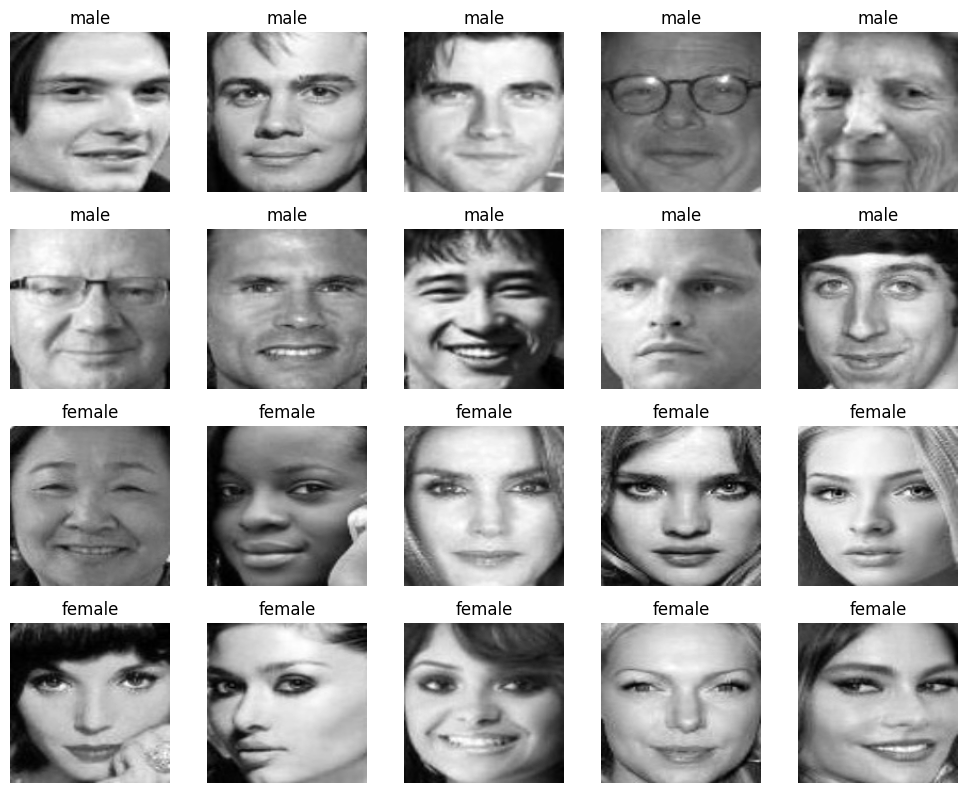

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Your dataset and organization code...

num_samples_to_visualize = 10

# Dictionary to store images for each category
category_images = {"male": [], "female": []}

# Organize images by category
for data in dataset:
    img_data = data[:-1]
    label = data[-1]
    category_images[label].append(img_data)

# Plot sample images
plt.figure(figsize=(10, 10))
for label, images in category_images.items():
    for i in range(num_samples_to_visualize):
        plt.subplot(5, 5, i + 1 + num_samples_to_visualize * list(category_images.keys()).index(label))
        img_data = images[i]
        img_array = np.array(img_data, dtype=np.uint8).reshape(150, 150)
        plt.imshow(img_array, cmap='gray')
        plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [137]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,58,53,42,34,32,30,32,34,39,44,...,22,24,24,24,24,23,24,24,25,male
1,49,49,49,49,49,47,45,41,36,32,...,101,96,91,74,51,45,41,45,47,male
2,1,2,4,7,9,14,19,21,24,25,...,98,104,109,112,116,120,124,126,128,male
3,33,34,36,38,40,43,47,49,51,53,...,149,168,186,200,209,209,206,200,197,male
4,76,75,73,70,68,67,67,65,62,60,...,112,108,103,100,102,112,118,118,118,male


**Renaming Target**

In [138]:
df.rename(columns={df.iloc[:,-1].name:'Target'},inplace=True)


In [139]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,58,53,42,34,32,30,32,34,39,44,...,22,24,24,24,24,23,24,24,25,male
1,49,49,49,49,49,47,45,41,36,32,...,101,96,91,74,51,45,41,45,47,male
2,1,2,4,7,9,14,19,21,24,25,...,98,104,109,112,116,120,124,126,128,male
3,33,34,36,38,40,43,47,49,51,53,...,149,168,186,200,209,209,206,200,197,male
4,76,75,73,70,68,67,67,65,62,60,...,112,108,103,100,102,112,118,118,118,male


**Lets Randomize the Data**

In [140]:
#get num of rows of dataset
num_rows=len(df)
#generate permutated indices
permuted_indices=np.random.permutation(num_rows)
#generate random data
random_df=df.iloc[permuted_indices]

**Encoding the label**

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
x=random_df.drop('Target',axis=1)
x=x/255
x.head()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
1208,0.615686,0.603922,0.580392,0.572549,0.568627,0.584314,0.607843,0.635294,0.662745,0.694118,...,0.678431,0.690196,0.709804,0.733333,0.745098,0.756863,0.737255,0.721569,0.709804,0.701961
447,0.050980,0.047059,0.043137,0.039216,0.047059,0.070588,0.074510,0.070588,0.109804,0.145098,...,0.364706,0.360784,0.356863,0.333333,0.309804,0.286275,0.298039,0.325490,0.356863,0.380392
1460,0.627451,0.623529,0.615686,0.627451,0.643137,0.623529,0.607843,0.611765,0.615686,0.623529,...,0.301961,0.380392,0.454902,0.525490,0.556863,0.584314,0.403922,0.235294,0.125490,0.062745
1503,0.278431,0.286275,0.305882,0.317647,0.325490,0.333333,0.337255,0.349020,0.356863,0.376471,...,0.270588,0.270588,0.278431,0.274510,0.247059,0.235294,0.258824,0.282353,0.305882,0.317647
1219,0.490196,0.501961,0.525490,0.509804,0.478431,0.474510,0.478431,0.458824,0.443137,0.498039,...,0.545098,0.549020,0.556863,0.564706,0.529412,0.498039,0.490196,0.509804,0.580392,0.619608


In [143]:
encoder=LabelEncoder()
y=random_df.Target
y_encoded=encoder.fit_transform(y)
y_series=pd.Series(y_encoded,name='target')


In [144]:
df_encoded=pd.concat([x,y_series],axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,target
1208,0.615686,0.603922,0.580392,0.572549,0.568627,0.584314,0.607843,0.635294,0.662745,0.694118,...,0.690196,0.709804,0.733333,0.745098,0.756863,0.737255,0.721569,0.709804,0.701961,0
447,0.050980,0.047059,0.043137,0.039216,0.047059,0.070588,0.074510,0.070588,0.109804,0.145098,...,0.360784,0.356863,0.333333,0.309804,0.286275,0.298039,0.325490,0.356863,0.380392,0
1460,0.627451,0.623529,0.615686,0.627451,0.643137,0.623529,0.607843,0.611765,0.615686,0.623529,...,0.380392,0.454902,0.525490,0.556863,0.584314,0.403922,0.235294,0.125490,0.062745,0
1503,0.278431,0.286275,0.305882,0.317647,0.325490,0.333333,0.337255,0.349020,0.356863,0.376471,...,0.270588,0.278431,0.274510,0.247059,0.235294,0.258824,0.282353,0.305882,0.317647,1
1219,0.490196,0.501961,0.525490,0.509804,0.478431,0.474510,0.478431,0.458824,0.443137,0.498039,...,0.549020,0.556863,0.564706,0.529412,0.498039,0.490196,0.509804,0.580392,0.619608,0


# **1Classification Using Support Vector Machine Model**

In [145]:
from sklearn.svm import SVC
model_svc=SVC()

In [146]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=1)


**Fitting the Model On Training data**

In [147]:
model_svc.fit(x_train,y_train);

**Model Evaluation**

In [148]:
y_preds=model_svc.predict(x_test)

In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

Accuracy: 0.8285024154589372
Classification Report               precision    recall  f1-score   support

           0       0.78      0.85      0.82       186
           1       0.87      0.81      0.84       228

    accuracy                           0.83       414
   macro avg       0.83      0.83      0.83       414
weighted avg       0.83      0.83      0.83       414



<Axes: >

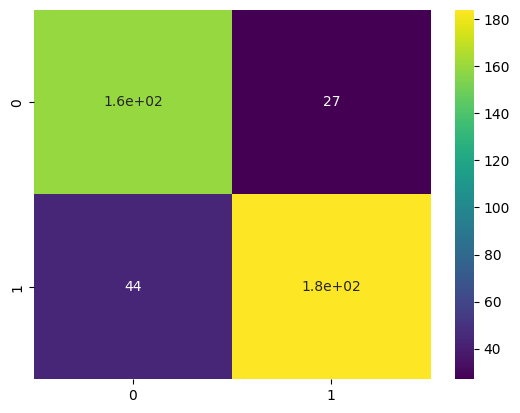

In [150]:
Accuracy=accuracy_score(y_preds,y_test)
print('Accuracy:',Accuracy)
CR=classification_report(y_preds,y_test)
print('Classification Report',CR)
cm=confusion_matrix(y_preds,y_test)
sns.heatmap(cm,annot=True,cmap="viridis")

**Comparison of Predicted values vs actual values**

1 Represent Male and 0 Represents female

In [151]:
actual_vs_predicted={'Predictions':y_preds,'True Values':y_test}
Result=pd.DataFrame(actual_vs_predicted)
print('Actual vs predicted values')
Result.head(20)

Actual vs predicted values


,Predictions,True Values
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


**DeployMent**

In [152]:
import joblib
trained_model=joblib.dump(model_svc,'gender_classificaation_svc.joblib')

**Let's test our Model**

Text(0.5, 1.0, 'male')

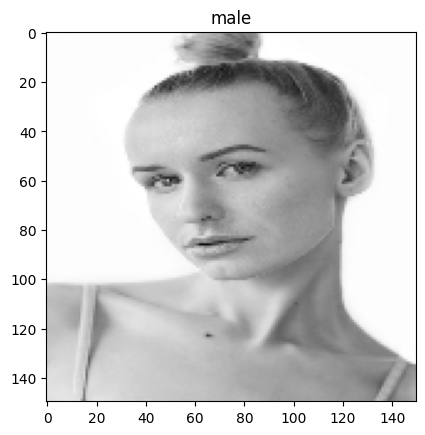

In [153]:
image_path = "/content/drive/MyDrive/R.jpeg"
user_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Resize the image to match the input size expected by the model
resized_image = cv.resize(user_image, (150, 150))

# Flatten the image
flattened_img = resized_image.flatten()

# Normalize the flattened image data
normalized_user_image = flattened_img / 255.0

# Convert the normalized flattened image to a NumPy array and reshape it
user_input = normalized_user_image.reshape(1, -1)

# Make a prediction using the trained model
user_prediction = model_svc.predict(user_input)
image=cv.cvtColor(resized_image,cv.COLOR_BGR2RGB)
# Decode the predicted label
predicted_class = encoder.inverse_transform(user_prediction)[0]
plt.imshow(image)
plt.title(predicted_class)

## **2Classification using Logistic Regression**

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
model_log=LogisticRegression()

In [156]:
model_log.fit(x_train,y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation**

In [157]:
y_preds=model_log.predict(x_test)

Accuracy Score is : 0.782608695652174
Classification report:               precision    recall  f1-score   support

           0       0.76      0.79      0.78       197
           1       0.80      0.78      0.79       217

    accuracy                           0.78       414
   macro avg       0.78      0.78      0.78       414
weighted avg       0.78      0.78      0.78       414



<Axes: >

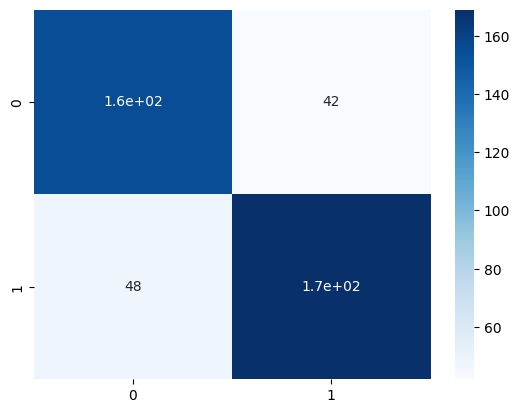

In [158]:
accuracy=accuracy_score(y_preds,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_preds,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_preds,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

Text(0.5, 1.0, 'male')

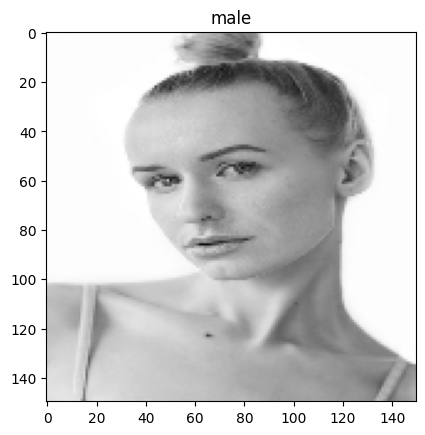

In [159]:
image_path='/content/drive/MyDrive/R.jpeg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_log.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)


# **3Classification Using Random Forest **

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
Rf_model=RandomForestClassifier(n_estimators=100)

In [ ]:
Rf_model.fit(x_train,y_train)

In [ ]:
y_preds=model_log.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_preds,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_preds,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_preds,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model**

In [ ]:
image_path='/content/drive/MyDrive/R.jpeg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=Rf_model.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)
